# Theano Tutorial 

Theano é uma biblioteca Python que nos permitirá definir, otimizar e calcular expressões matemáticas com tensores (arrays multi-dimensionais eficientemente). 

Caracteristicas do [Theano](http://www.deeplearning.net/software/theano/):

* __integração com numpy__ – Possibilidade de uso de numpy.ndarray como entrada para funções Theano.
* __uso de gpu transparente__ – Utilização do mesmo código para executar em gpu e cpu.
* __diferenciação simbólica__ – Theano calcula as derivadas para suas funções e parametros.
* __otimizações para velocidade e estabilidade__ – Obtenha respostas corretas para funções complexas como $log(1+x)$ mesmo se x for muito pequeno.
* __geração de código C dinâmico__ – Execução mais rápida.

O material a seguir foi adaptado do material disponibilizado por James Bergstra em seu [github](https://github.com/jaberg/IPythonTheanoTutorials/)

## Dica de import

Normalmente o import do theano é feito da seguinte forma: 

In [1]:
import theano
import theano.tensor as T

A idéia é separar funções theano de funções aplicadas a tensores.

## Introdução rápida ao numpy

Dado que a maioria das operações Theano seguem as mesmas normas das operações em vetores numpy o ideal é conhecer um pouco de numpy para testes rápidos, isso para evitar ter que compilar a função inteira para verificar se um operador funciona da maneira que você imaginou/entendeu da descrição.

Por exemplo, abaixo faremos a multiplicação de um escalar $a$ por um vetor de tamanho 3 $b$

In [2]:
import numpy as np
a = 2
b = np.array([1,2,3])
a*b

array([2, 4, 6])

Acima podemos ver que a multiplicação aconteceu elemento a elemento, como se o escalar 2 fosse um vetor [2,2,2] isso acontece pois ambos numpy e theano implementam broadcasting. Isso quer dizer que se um dos elementos da operação possui menos dimensões ou um valor 1 em alguma dimensão a biblioteca ira tentar espelhar o elemento maior para manter o tipo.

Podemos extender o exemplo para o caso de um vetor $a_2$ de tamanho 2 e uma matriz $b_2$ de tamanho [3,2]

In [17]:
a_2 = np.array([2,3])
b_2 = np.array([[1,2],[3,4],[5,-1]])
a_2*b_2

array([[ 2,  6],
       [ 6, 12],
       [10, -3]])

## Theano - parametros, expressões simbólicas e execução

Para repetirmos os calculos feitos em numpy com Theano precisaremos de alguns passos a mais. Isto vem do fato que o Theano precisa compilar o cálculo a ser executado baseado numa linguagem de programação simbólica.

Se quisermos repetir $a.b$ teremos que fazer:  

In [19]:
symbolic_a = T.lscalar('a')
symbolic_b = T.lvector('b')
a_vezes_b = symbolic_a*symbolic_b
a_vezes_b.eval({symbolic_a:a,symbolic_b:b})

array([2, 4, 6])

Podemos ver que temos 3 passos, declaração de parametros, geração de uma expressão simbólica e execução

### Declaração de parametros

Para fazermos a conexão entre o que queremos utilizar como parametros para nosso cálculo e os valores utilizados no cálculo precisamos declarar nossos parametros

```
symbolic_a = T.iscalar('a')
symbolic_b = T.ivector('b')
```

Aqui declaramos que as variaveis python symbolic_a e symbolic_b representam um escalar inteiro longo, ou seja int64, $a$ e um vetor de inteiros longos $b$.

Podemos utilizar vários tipos de parametros como:

* **byte**: ``bscalar, bvector, bmatrix, brow, bcol, btensor3, btensor4``
* **16-bit integers**: ``wscalar, wvector, wmatrix, wrow, wcol, wtensor3, wtensor4``
* **32-bit integers**: ``iscalar, ivector, imatrix, irow, icol, itensor3, itensor4``
* **64-bit integers**: ``lscalar, lvector, lmatrix, lrow, lcol, ltensor3, ltensor4``
* **float**: ``fscalar, fvector, fmatrix, frow, fcol, ftensor3, ftensor4``
* **double**: ``dscalar, dvector, dmatrix, drow, dcol, dtensor3, dtensor4``
* **complex**: ``cscalar, cvector, cmatrix, crow, ccol, ctensor3, ctensor4``

A lista completa de tipos está disponível [aqui](http://deeplearning.net/software/theano/library/tensor/basic.html#creation)

### Expressão simbólica

Dado que temos os nossos parametros como variáveis python, agora podemos gerar expressões simbólicas com os mesmos, simplesmente usando as operações matemáticas do python como

```
a_vezes_b = symbolic_a*symbolic_b
```

Onde estamos guardando a expressão simbólica de $a.b$ em uma variável chamada a_vezes_b. Essa variável possui a expressão e não o resultado, para obtermos o resultado precisamos executar a expressão passando paramêtros

### Execução de expressões

Agora que temos uma expressão podemos executá-la passando diferentes valores de a e b com 

```
a_vezes_b.eval({symbolic_a:a,symbolic_b:b})
```

Nesse caso estamos pedindo para que o Theano avalie o resultado de a vezes b baseado nos valores $a$ para o simbolo $a$ e b para o simbolo $b$. Poderiamos passar diferentes valores e utilizar o eval como uma função.

In [20]:
dict_params = {symbolic_a:a,symbolic_b:b}
a_vezes_b.eval(dict_params)

array([2, 4, 6])

In [21]:
dict_params = {symbolic_a:5,symbolic_b:np.array([4,5,7])}
a_vezes_b.eval(dict_params)

array([20, 25, 35])

Porém, não podemos usar $a_2$ e $b_2$ na função pois os tipos dos parametros não são os mesmos

In [23]:
dict_params = {symbolic_a:a_2,symbolic_b:b_2}
a_vezes_b.eval(dict_params)

TypeError: Bad input argument to theano function with name "<ipython-input-19-3ee22a3660e9>:4" at index 0 (0-based).  
Backtrace when that variable is created:

  File "/home/cadu/anaconda3/envs/ml_ruy/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/cadu/anaconda3/envs/ml_ruy/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/cadu/anaconda3/envs/ml_ruy/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/cadu/anaconda3/envs/ml_ruy/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/cadu/anaconda3/envs/ml_ruy/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/cadu/anaconda3/envs/ml_ruy/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/cadu/anaconda3/envs/ml_ruy/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-3ee22a3660e9>", line 1, in <module>
    symbolic_a = T.lscalar('a')
Wrong number of dimensions: expected 0, got 1 with shape (2,).

### Criação de funções

A execução de expressão não é a maneira mais eficiente de trabalhar com Theano. A cada vez temos que passar todos os simbolos e o que eles significam, o mais fácil seria transformar isso em uma função. Isso é possível da seguinte maneira:

In [24]:
f = theano.function(
    inputs=[symbolic_a,symbolic_b],
    outputs=[a_vezes_b])
f(a,b)

[array([2, 4, 6])]

Implicitamente o eval faz exatamente isso. Ele compila uma função que é chamada a cada vez que utilizamos eval. Também podemos nos aproveitar do function para adicionar mais do que um retorno, por exemplo, se quisessemos $a.b$ e $a+b$ poderiamos fazer:

In [25]:
a_vezes_b_mais_2 = a_vezes_b + 2
f = theano.function(
    inputs=[symbolic_a,symbolic_b],
    outputs=[a_vezes_b, a_vezes_b_mais_2])
f(a,b)

[array([2, 4, 6]), array([4, 6, 8])]

### Valores atualizaveis em funções

Imaginemos agora que além de calcular $a.b$ e $a+b$ nós precisamos guardar o acumulado da soma de ambos os resultados. Para isso utilizaremos um tipo de varíavel especial chamado shared. 

Esse procedimento pode não parecer fazer muito sentido para esse caso de exemplo. Porém é primordial para a atualização de pesos de uma rede neural por exemplo.

In [29]:
acumulador = theano.shared(np.int64(0))
update = acumulador+a_vezes_b.sum()+a_vezes_b_mais_2.sum()
f = theano.function(inputs=[symbolic_a,symbolic_b],
                    outputs=[a_vezes_b, a_vezes_b_mais_2],
                    updates=[(acumulador,update)])
print(acumulador.get_value())

0


In [30]:
f(a,b)
print(acumulador.get_value())

30


In [31]:
f(a,b)
print(acumulador.get_value())

60


In [32]:
f(a,b)
print(acumulador.get_value())

90


### Calculo de gradiente

Theano pode derivar facilmente as suas expressões simbólicas. Isso nos permite facilmente buscar o minimo de uma função usando a derivada.

Exemplo, $x^2+x-2$ se chutarmos um valor inicial e atualizarmos x via *stochastic gradient descent*: $$x = x + l_r.\frac{\partial_{formula}(x)}{\partial_x}$$ onde $l_r$ é um learning rate suficientemente pequeno eventualmente chegaremos a dos minimos da função.

$$l_r = -0.25$$

$$formula(x) = x^2+x-2$$

$$\frac{\partial_{formula}(x)}{\partial_x} = 2x - 1$$

$$x_{i+1} = x_i - l_r.(2x_i-1)$$

Como a fórmula é facil, trivialmente podemos obter o minimo igualando a derivada parcial a 0

$$2x-1 = 0 \implies x = -\frac{1}{2}$$

$$formula(0.5) = 0.25-0.5-2 = -2.25 $$

EPOCH 1
Formula = -2.0
Gradiente = 1.0
X utilizado = 0.0

EPOCH 2
Formula = -2.1875
Gradiente = 0.5
X utilizado = -0.25

EPOCH 3
Formula = -2.234375
Gradiente = 0.25
X utilizado = -0.375

EPOCH 4
Formula = -2.24609375
Gradiente = 0.125
X utilizado = -0.4375

EPOCH 5
Formula = -2.2490234375
Gradiente = 0.0625
X utilizado = -0.46875

EPOCH 6
Formula = -2.249755859375
Gradiente = 0.03125
X utilizado = -0.484375

EPOCH 7
Formula = -2.24993896484375
Gradiente = 0.015625
X utilizado = -0.4921875

EPOCH 8
Formula = -2.2499847412109375
Gradiente = 0.0078125
X utilizado = -0.49609375

EPOCH 9
Formula = -2.2499961853027344
Gradiente = 0.00390625
X utilizado = -0.498046875

EPOCH 10
Formula = -2.2499990463256836
Gradiente = 0.001953125
X utilizado = -0.4990234375



(-0.5, -2.25, 10)

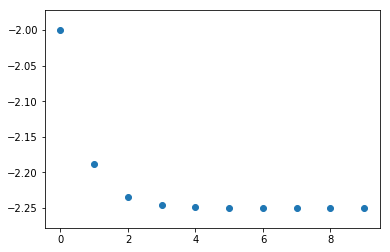

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

x = theano.shared(0.)
formula = x*x + x - 2
x_grad = T.grad(formula,x)
updates = x-0.25*x_grad
minimize = theano.function(
    inputs=[], 
    outputs=[formula,x_grad,x],
    updates=[(x,updates)])
convergiu = False
count = 0
x_values = []
y_values = []
while not convergiu and count < 1000:
    count += 1
    formula_result, grad, x_used = minimize()
    print("EPOCH {}".format(count))
    print("Formula = {}\nGradiente = {}\nX utilizado = {}".format(
            formula_result,grad,x_used))
    print()
    convergiu = np.isclose(x_used, x.get_value(),rtol=1e-3)
    x_values.append(x_used)
    y_values.append(formula_result)
plt.scatter(np.arange(len(y_values)),y_values)
x.get_value().round(2),formula_result.round(2),count

Se tivessemos escolhido uma formula mais complicada como:

$$formula = x^6+x^5-x^4+x^3-x^2+x-2$$

Teriamos

$$ l_r = 0.025 $$

$$\frac{d_{formula}(x)}{d_x} = 6x^5+5x^4-4x^3+3x^2-2x+1$$

$$x_{i+1} = x_i - l_r.(6x^5_i+5x^4_i-4x^3_i+3x^2_i-2x_i+1)$$


Nesse caso não é tão trivial encontrar o resultado. Consultando o wolfram podemos [Verificar](https://www.wolframalpha.com/input/?i=min(x**6+%2B+x**5+-+x**4+%2B+x**3+-+x**2+%2B+x+-+2)

EPOCH 1
Formula = -2.0
Gradiente = 1.0
X utilizado = 0.0

EPOCH 2
Formula = -2.0256410251464847
Gradiente = 1.0519393945312503
X utilizado = -0.025

EPOCH 3
Formula = -2.054072275139246
Gradiente = 1.1110640417416895
X utilizado = -0.05129848486328126

EPOCH 4
Formula = -2.085864346891623
Gradiente = 1.1790635057507726
X utilizado = -0.0790750859068235

EPOCH 5
Formula = -2.1217665406564743
Gradiente = 1.2581740202297031
X utilizado = -0.10855167355059281

EPOCH 6
Formula = -2.1627825536743277
Gradiente = 1.351392892137408
X utilizado = -0.1400060240563354

EPOCH 7
Formula = -2.210286377151282
Gradiente = 1.4627976204397808
X utilizado = -0.1737908463597706

EPOCH 8
Formula = -2.266204747613573
Gradiente = 1.598031276763521
X utilizado = -0.21036078687076512

EPOCH 9
Formula = -2.3333133928213488
Gradiente = 1.765057569253491
X utilizado = -0.25031156878985317

EPOCH 10
Formula = -2.4157348508549403
Gradiente = 1.9753623588298772
X utilizado = -0.29443800802119047

EPOCH 11
Formula = -

(-1.57287, -10.54354, 24)

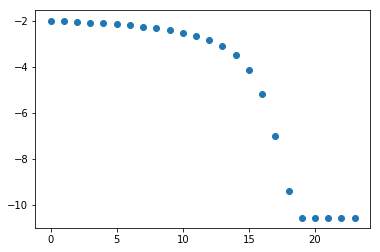

In [36]:

x = theano.shared(0.)
formula = x**6 + x**5 - x**4 + x**3 - x**2 + x - 2
x_grad = T.grad(formula,x)
updates = x-0.025*x_grad
minimize = theano.function(
    inputs=[], 
    outputs=[formula,x_grad,x],
    updates=[(x,updates)])
convergiu = False
count = 0
x_values = []
y_values = []
while not convergiu and count < 1000:
    count += 1
    formula_result, grad, x_used = minimize()
    print("EPOCH {}".format(count))
    print("Formula = {}\nGradiente = {}\nX utilizado = {}".format(
            formula_result,grad,x_used))
    print()
    convergiu = np.isclose(x_used, x.get_value(),rtol=1e-3)
    x_values.append(x_used)
    y_values.append(formula_result)
plt.scatter(np.arange(len(y_values)),y_values)
x.get_value().round(5),formula_result.round(5),count